<a href="https://colab.research.google.com/github/franz6ko/vision-artificial-2/blob/master/Clase-2/MNIST_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

### Carga y división del dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mnist-dataset.zip to mnist-dataset.zip


In [ ]:
!unzip mnist-dataset.zip

Archive:  mnist-dataset.zip
  inflating: train.csv               


In [ ]:
db = pd.read_csv('train.csv')

X = db.drop('label', axis=1).values
y = db['label'].values

X = X * 1.0/255
X = X.reshape(X.shape[0],28,28,1)

y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.shape

(42000, 28, 28, 1)

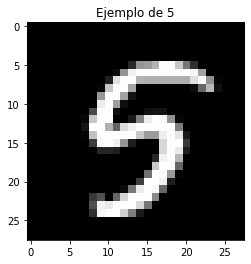

In [ ]:
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8,:,:,0], cmap='gray')

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [ ]:
# LeNet-5
model = models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='tanh', strides=1, padding='same', input_shape=(28,28,1)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16, (5,5), activation='tanh', strides=1, padding='valid'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(120, (5,5), activation='tanh', strides=1, padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [ ]:
opt = optimizers.Adam(learning_rate=0.01)

model.compile(loss="categorical_crossentropy",
              optimizer=opt,
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=4,batch_size= 50,
                    validation_data=(X_test, y_test))

Epoch 1/4
588/588 [==============================] - 22s 36ms/step - loss: 0.2995 - accuracy: 0.9086 - val_loss: 0.2268 - val_accuracy: 0.9351
Epoch 2/4
588/588 [==============================] - 21s 36ms/step - loss: 0.1917 - accuracy: 0.9417 - val_loss: 0.1919 - val_accuracy: 0.9431
Epoch 3/4
588/588 [==============================] - 21s 35ms/step - loss: 0.1737 - accuracy: 0.9476 - val_loss: 0.2029 - val_accuracy: 0.9406
Epoch 4/4
588/588 [==============================] - 21s 35ms/step - loss: 0.1617 - accuracy: 0.9506 - val_loss: 0.2000 - val_accuracy: 0.9399


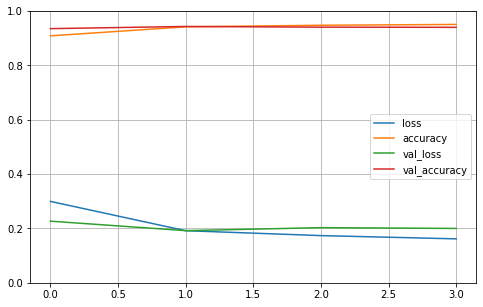

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

[8 1 9 9 8]
[8 1 9 9 8]


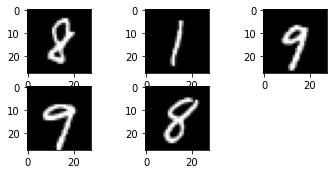

In [ ]:
# Predecir las primeras 5 imágines del test set
predicciones = model.predict(X_test[:5])

# Imprimir las predicciones
print(np.argmax(predicciones, axis=1))

# Chequear que son correctas
print(np.argmax(y_test[:5], axis=1))

# Plotear esas imágenes
for i in range(5):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_test[i,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()